# Text Generation

* 게임플랫폼 '스팀'의 리뷰 생성기를 제작해보자.

# Data : Steam reviews


In [1]:
# 처음 설치할때만 실행하고, 그 후에는 주석처리 하세요.
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 24.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/steam.txt'
data= pd.read_table(url, names=['label', 'reviews'])

# Q1. data안의 'reviews'만 가져와 전처리 하시오.

1. 'reviews'컬럼만 사용한다.
2. 'reviews'의 문장들을 하나의 list로 담는다.
3. reviews에 선언한다.
4. 처음 10000개 문장만 사용하기로 한다.(그렇지 않으면 매우 느려진다.)

In [9]:
####################
## Your Code here ##
####################
reviews = data['reviews'].tolist()[:10000]

# (+optional)Q2. reviews안의 모든 문장에, 형태소 사이 사이에 띄어쓰기를 추가하라.

* 없이 진행해보고, 나중에 추가하여 비교해보자.
* konlpy의 Okt를 사용한다.
* 시간이 꽤 걸릴 수 있으니, 처음에는 정상적으로 루프가 동작하는지 처음 10개 리뷰만 가지고 테스팅해가며 진행한다.
* 전체 문장을 전부 진행할경우, 약 1~2분 정도 걸린다.

In [16]:
%%time
####################
## Your Code here ##
####################
from konlpy.tag import Okt
okt = Okt()
temp = []

for  i in reviews:
    temp.append(' '.join(okt.morphs(i)))
print(temp)

['노래 가 너무 적음', '돌겠네 진짜 . 황숙 아 , 어크 공장 그만 돌려라 . 죽는다 .', '막노동 체험판 막노동 하는 사람 인데 장비 를 내 가 사야 돼 뭐 지', '차악 ! 차악 !! 차악 !!! 정말 이래서 왕국 을 되찾을 수 있는거야 ??', '시간 때우기에 좋음 .. 도전 과제 는 50시간 이면 다 깰 수 있어요', '역시 재미있네요 전작 에서 할수 없었던 자유로운 덱 빌딩 도 좋네요 ^^', '재미있었습니다 .', '은근 쉽지만 은근 어려운 게임', '베 ㅈ 스 다 이 개 ^ ㅐ 끼 들 아 . 시작 할 때 체스판 돌아가는거 5분 동안 3 번 봤 더 나 ㅈㄴ 빡치네 진짜 무한 로딩 버그 안 쳐 고치냐 겜 하지말라는 거 냐', '1시간 40분 동안 스트레스 다 풀림 ㄹㅇ', '걍 겜임 계정 을 못 만들어 미친 겜', '관람객 vs 호랑이 불가', '재미 쩡 !!! 초반 에 좀 힘들어여 도트 라서 조아', '포켓볼 1 도 몰랐는데 , 이 걸 로 배워 갑니다 . 심심할 때 하면 좋아요 . 컴퓨터 상대 하는거 제대로 이겨 보고 싶은데 잘 안되네요 .', '트레이아크 사랑 해요 핰핰', '좆망 겜 하지마 무슨 처음 에 키 자마자 매칭 이 왜 91 렙 하고 매칭 되냐', '뭐랄까 다크 소울 하 는 느낌 이에요 죽으면 돈 다날 라가 는 방식 렙업 하면서 무한 반복 인거 같은데 재미있습니다 클래스 도 은근 많은거 같고 또 캐릭터 를 계속 추가 할 예정 인가 같고 그리고 할 요소 하고 매번 던전 도 바뀌고 재미있습니다 돈 이 아깝지 않다고 생각 드 네 요 ㅊㅊ', '원하는거 보실려면 홈페이지 가셔서 R - 18 패치 를 사셔야 합니다 . 패치 가 만원 이라 사실 상 2만원 주고 게임 을 사는 건데 ... /// ㅁ /// 좋던데요 ?', '안해 썩을 4-5 까진 그냥 대충 슥 슥 해도 되더니 4-6 에서 판때 기를 직접 사용 하는데 판 을 밟는 순간 서있는 땅 이 변해 버리니까 뭔가 억울하면서 하기 싫어졌음 그래도 일단 이 놈 을 못잡으면 왠지 못 깨서 안 하

In [18]:
reviews = temp

# Q3. reviews를 띄어쓰기 기준으로 tokenize하고, index의 sequence로 바꾸어 내시오.

**조건**
* revews_seq 에 선언해둔다.
* 패딩에 사용할 0을 포함하여, 상위 20000개 단어를 사용하자.
    * tokenizer는 num_words에 20000을 주면, 사용자가 0을 사용할 것을 감안하여 상위 1999개만 추려준다.  패딩 포함하면 자동으로 20000개가 된다.
    * max_words = 20000 을 활용한다.

In [20]:
####################
## Your Code here ##
####################
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 20000
tk = Tokenizer(num_words=max_words, lower=False)
tk.fit_on_texts(reviews)
reviews_seq = tk.texts_to_sequences(reviews)

# Q4.reviews_seq 에서 길이가 2이하인 seq를 제거하시오.

* 그대로 다시 reviews_seq에 선언한다.

In [23]:
####################
## Your Code here ##
####################
temp = []
for i in reviews_seq:
    if len(i) > 2:
        temp.append(i)
print(temp)

[[724, 3, 16, 2721], [9794, 56, 9795, 58, 2061, 3462, 1900, 9796, 2722], [6517, 2723, 6517, 23, 33, 70, 1237, 9, 47, 3, 1549, 921, 74, 81], [4983, 4983, 4983, 57, 3060, 4984, 4, 9797, 48, 6518], [62, 9798, 336, 110, 130, 8, 2724, 613, 19, 1770, 48, 670], [244, 1379, 240, 28, 533, 3463, 3464, 2725, 4985, 6, 922], [923, 4069, 923, 446, 2], [4070, 298, 549, 19, 1, 34, 3465, 1184, 11, 58, 107, 20, 29, 9799, 6519, 989, 402, 66, 194, 9800, 38, 31, 702, 1771, 56, 614, 337, 67, 15, 338, 6520, 18, 6521, 39, 381], [510, 3062, 402, 629, 19, 6522, 412], [274, 823, 1123, 4, 21, 511, 584, 18], [9801, 3063, 6523, 1309], [35, 9802, 241, 5, 27, 9803, 924, 573, 6524], [9804, 54, 6, 4986, 1, 89, 12, 6525, 925, 1380, 29, 45, 703, 389, 725, 726, 353, 6526, 142, 1238, 42, 727], [9805, 890, 1901, 9806], [437, 18, 615, 206, 79, 5, 125, 1239, 512, 1, 41, 9807, 4071, 25, 512, 2466], [2062, 574, 585, 71, 8, 86, 1185, 1772, 69, 6527, 6528, 8, 354, 6529, 207, 614, 233, 752, 275, 431, 4072, 6, 923, 9808, 704, 287, 

In [24]:
reviews_seq = temp

# Q5. reviews_seq안의 모든 문장을 다음과 같이 재구성하시오.

**예시**
* reviews_seq가 [ [1,2,3], [7,2,9,10] ] 라면
* 결과 : reviews_seq = [ [1, 2], [1,2,3], [7,2], [7,2,9], [7,2,9,10] ]
* 중간에 다른 변수를 임시로 사용해도 좋다.

In [28]:
####################
## Your Code here ##
####################
temp = []
for i in reviews_seq:
    for j in range(1, len(i)):
        temp.append(i[:j + 1])
print(temp[:5])

[[724, 3], [724, 3, 16], [724, 3, 16, 2721], [9794, 56], [9794, 56, 9795]]


In [29]:
reviews_seq = temp

# Q6. reviews_seq안의 seq의 길이를 통일하시오.

**Questions**
1. 0을 앞에 덧대야 할까, 뒤에 덧대야 할까?
2. max_len = 11 ( x로 활용할 10, y로 활용할 1 )
3. reviews_seq의 shape를 확인하라.

In [32]:
####################
## Your Code here ##
####################
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 11
reviews_seq = pad_sequences(reviews_seq, maxlen=max_len, padding='pre', truncating='post') # 0은 앞에 덧대고, 길면 뒤를 자르기
reviews_seq.shape

(156896, 11)

# Q7. reviews_seq의 마지막 컬럼은 y로, 나머지 컬럼은 x로 분할하라.

In [33]:
####################
## Your Code here ##
####################
x = reviews_seq[:, :-1]
y = reviews_seq[:, -1]

# 주의. y를 원핫 인코딩 하지 않을 예정. 메모리가 버티지 못할 수 있다.

# Q8. 문장을 받아, 다음 단어를 선택하는 모델을 만드시오.

* 컴파일까지 마치시오.
    * 모니터링 지표로 accuracy 사용
    * loss 를 sparse_categorical_crossentropy를 사용해야만, y를 원핫인코딩 하지 않고도 학습시킬 수 있다.
* 모델 구조는 아래와 같다.
    1. 임베딩 레이어 : 임베딩 차원 256, 문장길이 10
    2. GRU, 128, 모든 출력을 다음 layer로
    3. GRU, 128, 모든 출력을 다음 layer로
    4. MaxPool1D, 필터사이즈 2
    4. GRU, 256, 모든 출력만 다음 레이어로.
    4. GRU, 256, 모든 출력만 다음 레이어로.
    4. MaxPool1D, 필터사이즈 2
    4. GRU, 512, 마지막 출력만 다음 레이어로.
    5. 멀티클래스(max_words만큼)분류하는 아웃풋레이어


In [36]:
####################
## Your Code here ##
####################
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten
from tensorflow.keras.layers import GRU, MaxPool1D

In [40]:
####################
## Your Code here ##
####################
# 세션 클리어
K.clear_session()

# 모델 구성
# 0. Input
il = Input(shape=(max_len - 1))
# 1. 임베딩 레이어 : 임베딩 차원 256, 문장길이 10
hl = Embedding(max_words, 256, input_length=max_len - 1)(il)
# 2. GRU, 128, 모든 출력을 다음 layer로
hl = GRU(128, return_sequences=True)(hl)
# 3. GRU, 128, 모든 출력을 다음 layer로
hl = GRU(128, return_sequences=True)(hl)
# 4. MaxPool1D, 필터사이즈 2
hl = MaxPool1D(2)(hl)
# 5. GRU, 256, 모든 출력만 다음 레이어로.
hl = GRU(256, return_sequences=True)(hl)
# 6. GRU, 256, 모든 출력만 다음 레이어로.
hl = GRU(256, return_sequences=True)(hl)
# 7. MaxPool1D, 필터사이즈 2
hl = MaxPool1D(2)(hl)
# 8. GRU, 512, 마지막 출력만 다음 레이어로.
hl = GRU(512, return_sequences=False)(hl)
# 9. 멀티클래스(max_words만큼)분류하는 아웃풋레이어
ol = Dense(max_words, activation='softmax')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding (Embedding)       (None, 10, 256)           5120000   
                                                                 
 gru (GRU)                   (None, 10, 128)           148224    
                                                                 
 gru_1 (GRU)                 (None, 10, 128)           99072     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                                 
 gru_2 (GRU)                 (None, 5, 256)            296448    
                                                             

# Q8. 모델을 학습시킬 것.

* batch_size = 1024
* epochs = 60


In [41]:
####################
## Your Code here ##
####################
history = model.fit(x, y, epochs=60, batch_size=1024)

Epoch 1/60
154/154 [==============================] - 49s 202ms/step - loss: 7.7146 - accuracy: 0.0318
Epoch 2/60
154/154 [==============================] - 19s 123ms/step - loss: 7.1356 - accuracy: 0.0316
Epoch 3/60
154/154 [==============================] - 15s 98ms/step - loss: 6.7662 - accuracy: 0.0551
Epoch 4/60
154/154 [==============================] - 13s 84ms/step - loss: 6.4346 - accuracy: 0.0865
Epoch 5/60
154/154 [==============================] - 12s 79ms/step - loss: 6.1118 - accuracy: 0.1169
Epoch 6/60
154/154 [==============================] - 12s 77ms/step - loss: 5.7538 - accuracy: 0.1585
Epoch 7/60
154/154 [==============================] - 12s 76ms/step - loss: 5.3031 - accuracy: 0.2255
Epoch 8/60
154/154 [==============================] - 13s 82ms/step - loss: 4.8706 - accuracy: 0.3001
Epoch 9/60
154/154 [==============================] - 12s 77ms/step - loss: 4.4808 - accuracy: 0.3769
Epoch 10/60
154/154 [==============================] - 12s 80ms/step - loss: 4.2

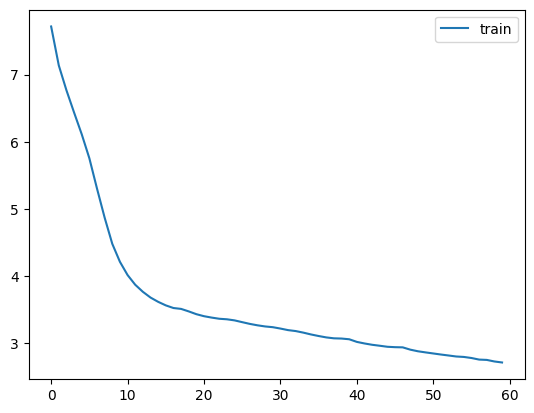

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

# (+권장)Q9. 다음의 함수를 제작한다.

* 인풋 : 사용할 첫 단어, 반복 예측 수, 사용할 모델, 사용할 tokenizer
* 내부 : 모든 예측 중 하나를 확률에 맞추어 sampling 한다.
    * np.random.choice 이용. 만일 '바람'일 확률이 80%라면, 100번에 80번 정도는 바람이, 20번 정도는 다른 단어가 선택될 것이다.
* 아웃풋 : 완성된 문장.
* 반복 예측 수 : 9이상이면 다음의 문구를 출력하고 함수 동작을 종료한다.
    * "8이하의 반복예측만 가능합니다."
* 예시 :
```
reviewer("나", 4, tk, model )
>> "나 추억 한다면 힘차게 걸으리라"
reviewer("나", 4, tk, model )
>> "나 사랑 했다면 미소 를"
```

In [52]:
####################
## Your Code here ##
####################
def reviewer(first_word, n, tk, model):
    if n >= 9:
        print('8이하의 반복예측만 가능합니다.')
        return
    for i in range(n):
        first_words = [first_word]
        temp = tk.texts_to_sequences(first_words)
        temp = pad_sequences(temp, maxlen=max_len - 1, padding='pre')

        y_pred = model.predict(temp, verbose=0)
        idx = np.random.choice(max_words, p=y_pred.reshape(-1))
        next_word = tk.index_word[idx]
        first_word = first_word + " " + next_word
    return first_word

In [57]:
#######################
## Your testing here ##
#######################
reviewer('나', 4, tk, model)

'나 같은것 없어서 은 후회될'

In [58]:
reviewer('나', 4, tk, model)

'나 F 님 끝내기 알찬'

In [59]:
reviewer('나', 4, tk, model)

'나 까지 샵 가 을'

In [60]:
reviewer('나', 4, tk, model)

'나 모션 앤 이 ㄹ'

In [61]:
reviewer('나', 4, tk, model)

'나 을 시스템 애가 게임'

In [62]:
reviewer('게임', 4, tk, model)

'게임 겜 구매 여 파쿠르'

In [63]:
reviewer('게임', 4, tk, model)

"게임 을 은 sm '"

In [64]:
reviewer('게임', 4, tk, model)

'게임 를 널지오 꼭 하는데'

In [65]:
reviewer('게임', 4, tk, model)

'게임 의 The 안됩니다 의'